<a href="https://colab.research.google.com/github/BrunoKlein504/depression_pln/blob/main/ML_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste

In [ ]:
!pip install pandas nltk scikit-learn textblob

In [ ]:
#INFORMAÇÕES
#link pra download https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression
#MODELO BASE -> https://www.kaggle.com/models/angelchaudhary/texts-emotions-prediction-model
# OUTRO DATA_SET = https://huggingface.co/datasets/joangaes/depression
# DATA_SET REDDIT = https://www.kaggle.com/datasets/rishabhkausish/reddit-depression-dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# TODO: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  MODELO DE MACHINE LEARNING
#       https://textblob.readthedocs.io/en/dev/ Textblob -> Bag_of_Words e classificação ternária

In [ ]:
#DATASET
dataset = kagglehub.dataset_download("infamouscoder/mental-health-social-media")
df = pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv")
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


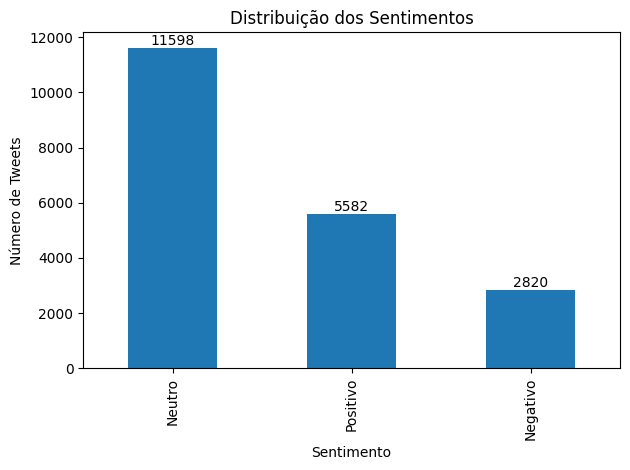

In [ ]:
#ANALISE PALAVRAS POSITIVAS E NEGATIVAS
#Dataset utilizado foi o do twitter -> https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression

#IMPORTs
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd  # Adicionado para garantir que o pandas seja importado corretamente

#DEFs
def analisar_sentimento(texto):
    return TextBlob(texto).sentiment.polarity

def preprocessar(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto)  # remover URLs
    texto = re.sub(r"[^a-zA-Z\s]", '', texto)  # remover pontuações
    tokens = word_tokenize(texto)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return " ".join(tokens)

def classificar_sentimento(polaridade):
    if polaridade > 0.1:
        return "Positivo"
    elif polaridade < -0.1:
        return "Negativo"
    else:
        return "Neutro"

#DATASET
dataset = kagglehub.dataset_download("infamouscoder/mental-health-social-media")
df = pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv")

#TRATAMENTO
df = df.dropna(subset=["post_text"])  # remover textos vazios

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab resource

df["texto_limpo"] = df["post_text"].apply(preprocessar)
df["polaridade"] = df["texto_limpo"].apply(analisar_sentimento)
df["sentimento"] = df["polaridade"].apply(classificar_sentimento)

#VISUALIZAÇÃO
ax = df["sentimento"].value_counts().plot(kind='bar', title="Distribuição dos Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Número de Tweets")

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()
#Essa análise indica que a maior parte das palavras desse dataset está com o sentimento "neutro" e sua minoria está exposta com o sentimento "negativo"

<ipython-input-8-a47048739120>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentimentos.index, y=sentimentos.values, palette=cores)


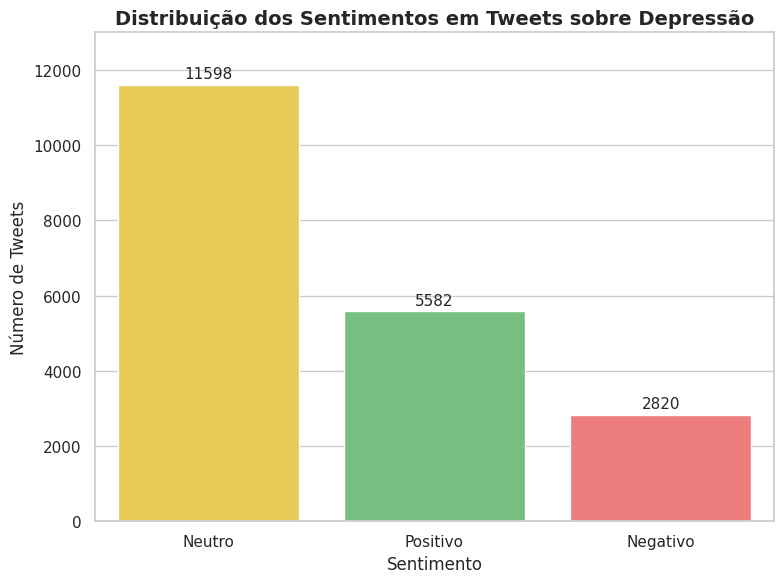

In [ ]:
#GRAFICO MELHOR QUE O DO MORISCO kkkkkkkkkk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Simulação dos dados de sentimentos
sentimentos = pd.Series({
    "Neutro": 11598,
    "Positivo": 5582,
    "Negativo": 2820
})

# Estilo Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Paleta de cores personalizada
cores = ["#FFD93D", "#6BCB77", "#FF6B6B"]

# Gráfico de barras
ax = sns.barplot(x=sentimentos.index, y=sentimentos.values, palette=cores)

# Títulos e rótulos
plt.title("Distribuição dos Sentimentos em Tweets sobre Depressão", fontsize=14, weight='bold')
plt.xlabel("Sentimento", fontsize=12)
plt.ylabel("Número de Tweets", fontsize=12)

# Limite superior do eixo Y ajustado
plt.ylim(0, 13000)

# Rótulos acima das barras
for i, valor in enumerate(sentimentos.values):
    plt.text(i, valor + 100, str(valor), ha='center', va='bottom', fontsize=11)

# Layout final
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of the bag of words matrix: (20000, 33058)
Top 10 palavras mais frequentes: [('depression', np.int64(880)), ('one', np.int64(696)), ('love', np.int64(597)), ('know', np.int64(580)), ('amp', np.int64(492)), ('good', np.int64(455)), ('go', np.int64(432)), ('say', np.int64(412)), ('new', np.int64(406)), ('thank', np.int64(400))]


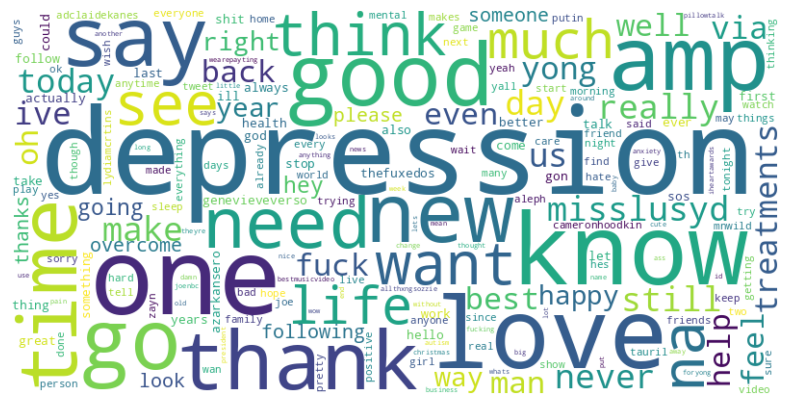

In [ ]:
#BAGWORD - dataset https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baixar recursos necessários
nltk.download('punkt')
nltk.download('stopwords')

# Carregar o dataset
df = pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv")

# Lista personalizada de palavras para remover (conjunções, pronomes, gírias etc.)
stop_words = set(stopwords.words('english'))
extra_words = {
    'you', 'youre', 'im', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'thats', 'theres', 'isnt', 'wasnt', 'arent', 'werent', 'dont', 'didnt', 'doesnt',
    'and', 'but', 'or', 'so', 'because', 'although', 'however', 'therefore', 'trump', 'realdonaldtrump',
    'twitter', 'cant', 'twitter', 'people','would', 'rt', 'putin'
    'biden', 'covid', 'corona', 'lol', 'omg', 'uh', 'uhh', 'um', 'like', 'just', 'get', 'got'
}
palavras_excluir = stop_words.union(extra_words)

# Função de limpeza de texto
def limpar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)  # remover caracteres não alfabéticos
    tokens = word_tokenize(texto)
    tokens = [t for t in tokens if t not in palavras_excluir]
    return " ".join(tokens)

# Aplicar limpeza ao texto
df['cleaned_text'] = df['post_text'].apply(limpar_texto)

# Criar a Bag of Words com texto já limpo
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Exibir o tamanho da matriz Bag of Words
print("Shape of the bag of words matrix:", X.shape)

# Contagem de frequência das palavras mais comuns
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, word_counts))
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Exibir as 10 palavras mais frequentes
print("Top 10 palavras mais frequentes:", word_freq[:10])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#A partir dessa análise rápida é possivel ter um direcionamento do conteúdo do dataset. Essas são as palavras que mais aparecem em 20000 tweets, foram contadas 32927 palavras.

In [ ]:
#ANALISE PALAVRAS POSITIVAS E NEGATIVAS
#Dataset utilizado foi o do twitter -> https://huggingface.co/datasets/joangaes/depression

import re
import requests
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt

# Baixar dados em lotes até o fim
def baixar_todos_dados(passo=100):
    todos_dados = []
    offset = 0
    while True:
        url = f"https://datasets-server.huggingface.co/rows?dataset=joangaes%2Fdepression&config=default&split=train&offset={offset}&length={passo}"
        resp = requests.get(url)
        if resp.status_code != 200:
            break

        dados = resp.json()["rows"]
        if not dados:
            print("Fim dos dados.")
            break

        todos_dados.extend([r["row"] for r in dados])
        if len(dados) < passo:
            print("Último lote recebido.")
            break
        offset += passo

    return pd.DataFrame(todos_dados)

# Baixar o dataset completo
df = baixar_todos_dados()

# Preparar NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessamento e análise
def preprocessar(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto)
    texto = re.sub(r"[^a-zA-Z\s]", '', texto)
    tokens = word_tokenize(texto)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return " ".join(tokens)

def analisar_sentimento(texto):
    return TextBlob(texto).sentiment.polarity

def classificar_sentimento(polaridade):
    if polaridade > 0.1:
        return "Positivo"
    elif polaridade < -0.1:
        return "Negativo"
    else:
        return "Neutro"

# Aplicar no DataFrame
df = df.dropna(subset=["text"])
df["texto_limpo"] = df["text"].apply(preprocessar)
df["polaridade"] = df["texto_limpo"].apply(analisar_sentimento)
df["sentimento"] = df["polaridade"].apply(classificar_sentimento)

# Visualização
ax = df["sentimento"].value_counts().plot(kind='bar', title="Distribuição dos Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Número de Textos")

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

#Essa análise indica que a maior parte das palavras desse dataset está com o sentimento "neutro" e sua minoria está exposta com o sentimento "negativo"

In [ ]:
#ANALISE PALAVRAS POSITIVAS E NEGATIVAS
#Dataset utilizado foi o do twitter -> https://huggingface.co/datasets/joangaes/depression


import pandas as pd
import requests
from sklearn.feature_extraction.text import CountVectorizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Baixar os dados do Hugging Face em lotes
def baixar_todos_dados(passo=100):
    todos_dados = []
    offset = 0
    while True:
        url = f"https://datasets-server.huggingface.co/rows?dataset=joangaes%2Fdepression&config=default&split=train&offset={offset}&length={passo}"
        resp = requests.get(url)
        if resp.status_code != 200:
            break

        dados = resp.json()["rows"]
        if not dados:
            print("Fim dos dados.")
            break

        todos_dados.extend([r["row"] for r in dados])
        if len(dados) < passo:
            print("Último lote recebido.")
            break
        offset += passo

    return pd.DataFrame(todos_dados)

# Baixar o dataset completo
df = baixar_todos_dados()

# Limpeza dos textos: removendo caracteres não alfabéticos e convertendo para minúsculas
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x).lower()))

# Criar a Bag of Words
vectorizer = CountVectorizer(stop_words='english')  # Ignorar palavras comuns em inglês
X = vectorizer.fit_transform(df['cleaned_text'])

# Exibir a Bag of Words
print("Shape of the bag of words matrix:", X.shape)

# Contagem de frequência das palavras mais comuns
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, word_counts))  # Agora é um dicionário
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print(word_freq[:10])  # Exibe as 10 palavras mais frequentes

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(word_freq))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#A partir dessa análise rápida é possivel ter um direcionamento do conteúdo do dataset. Essas são as palavras que mais aparecem em 5000 tweets, foram contadas 26672 palavras.

In [ ]:
#ESTATISTICA DAS PALAVRAS POSITIVAS E NEGATIVAS

# MONOGRAFIA - Segundo Semestre (Metodologia)

In [1]:
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import Word
from wordcloud import WordCloud
# from nltk.tokenize import RegexpTokenizer

In [2]:
df = pd.read_csv('Mental-Health-Twitter.csv', usecols=range(1,11))

## Fazendo um leve tratamento

### Post_Created

In [3]:
df['post_created'] = pd.to_datetime(df['post_created'])

C:\Users\Bruno Gomes\AppData\Local\Temp\ipykernel_20200\2960235542.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['post_created'] = pd.to_datetime(df['post_created'])


In [4]:
new_df = df.assign(
    month=df['post_created'].dt.month,
    year=df['post_created'].dt.year
).drop('post_created', axis=1)

## Processamento Textual (Iniciando a Tokenização)

In [5]:
new_df['tokens'] = new_df['post_text'].str.lower() # Deixando tudo Lowercase

In [6]:
new_df['tokens'].replace(r'\d', '', regex=True, inplace=True) # Removendo valores numéricos

C:\Users\Bruno Gomes\AppData\Local\Temp\ipykernel_20200\1938088356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['tokens'].replace(r'\d', '', regex=True, inplace=True) # Removendo valores numéricos


In [7]:
new_df['tokens'].replace(r'https?', '', regex=True, inplace=True) # removendo links

C:\Users\Bruno Gomes\AppData\Local\Temp\ipykernel_20200\2478939148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['tokens'].replace(r'https?', '', regex=True, inplace=True) # removendo links


In [8]:
new_df['tokens'].replace(r'[^\w\s]*', '', regex=True, 
                        #  inplace=True
                         ) # Técnica para remover pontuações

0        its just over  years since i was diagnosed wit...
1        its sunday i need a break so im planning to sp...
2        awake but tired i need to sleep but my brain h...
3        rt sewhq retro bears make perfect gifts and ar...
4        its hard to say whether packing lists are maki...
                               ...                        
19995                 a day without sunshine is like night
19996    borens laws  when in charge ponder  when in tr...
19997    the flow chart is a most thoroughly oversold p...
19998    ships are safe in harbor but they were never m...
19999        black holes are where god is dividing by zero
Name: tokens, Length: 20000, dtype: object

In [9]:
new_df['tokens'].replace(r'\W', ' ', regex=True, 
                         inplace=True
                         ) # Técnica para remover pontuações

C:\Users\Bruno Gomes\AppData\Local\Temp\ipykernel_20200\1667280573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['tokens'].replace(r'\W', ' ', regex=True,


In [10]:
new_df['tokens'] = new_df['tokens'].str.split()

### Removendo Palavras Vazias

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Bruno
[nltk_data]     Gomes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# print(*stop_words, sep='\n')

In [12]:
stop_words = stopwords.words('english')
stop_words.extend(['rt', 'co'])

new_df['tokens_filtered'] = new_df.apply(lambda x: [word for word in x['tokens'] if word not in stop_words], axis=1)

### Lematização

In [13]:
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to C:\Users\Bruno
[nltk_data]     Gomes\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Bruno
[nltk_data]     Gomes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
new_df['final_tokens'] = new_df['tokens_filtered'].apply(lambda x: [lemmatizer.lemmatize(word, pos='v') for word in x])

## Wordcloud

In [15]:
text = " ".join(
    [
        " ".join(phrase) for phrase in new_df['final_tokens']
    ]
)

In [16]:
wordcloud = WordCloud(
    background_color='#FFFFFF',
    collocations=False
).generate(text)

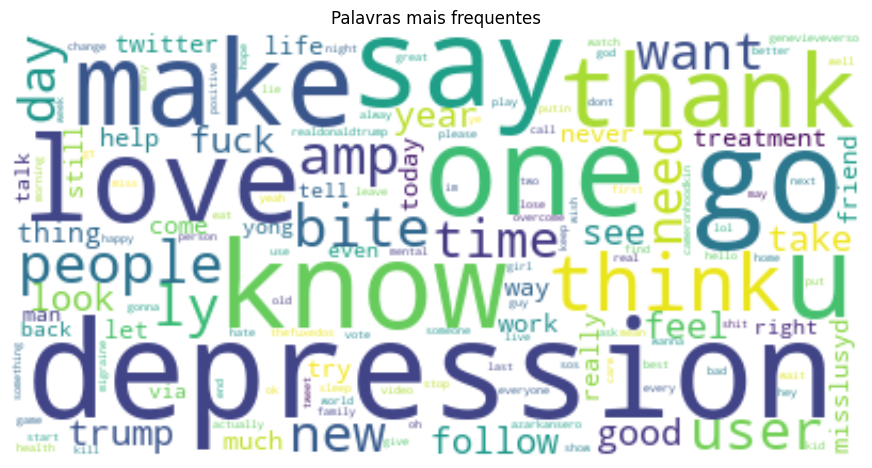

In [17]:
plt.figure(figsize=[11, 11])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Palavras mais frequentes')
plt.show()

In [21]:
new_df.to_excel('mockup_dataset.xlsx')

## **Hipótese N°1: Superando a Limitação da Concisão de Tweets para Análise de Comorbidades**

**1. Contextualização e Problemática**

A análise de textos de usuários para identificar possíveis comorbidades é um dos pilares deste projeto. No entanto, os tweets, por sua natureza inerentemente curta, oferecem um material textual limitado. Uma análise isolada de cada tweet pode não fornecer profundidade suficiente para inferências robustas, fugindo assim do escopo principal de analisar um "relatório" do usuário.

**2. Estratégia de Mitigação**

Para contornar essa limitação, propõe-se a unificação de todos os tweets pertencentes a um mesmo indivíduo. Através da coluna `user_id`, é possível agregar o conteúdo textual de cada usuário, formando um documento consolidado que serve como um relatório mais completo de suas expressões e sentimentos ao longo do tempo.

**3. Plano de Execução**

O projeto seguirá as seguintes etapas metodológicas:

* **Fase 1: Análise de Sentimentos com Ferramentas Pré-treinadas**
    * Inicialmente, aplicaremos as bibliotecas `textblob` e `vader` sobre o corpus de cada usuário. O objetivo é obter uma linha de base rápida e eficiente sobre a polaridade e a subjetividade dos textos.

* **Fase 2: Desenvolvimento de um Classificador Customizado (Opcional)**
    * Dependendo do cronograma, avançaremos para a criação de um modelo de classificação de sentimentos customizado. Esta fase envolverá o uso de técnicas de processamento de linguagem natural, como **TF-IDF** (Term Frequency-Inverse Document Frequency) e **N-grams**, para capturar nuances contextuais mais específicas do nosso domínio.

* **Fase 3: Modelagem Preditiva e Expansão do Dataset**
    * Com os sentimentos classificados, utilizaremos algoritmos de *Machine Learning* para identificar padrões e correlações.
    * Para aumentar a robustez e a generalização dos nossos modelos, buscaremos datasets complementares de fontes com textos mais longos e detalhados, como o Reddit.

## Usando Textblob e VADER

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Bruno
[nltk_data]     Gomes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
# Usando o df original por experiência

df['vader_scores'] = df['post_text'].apply(lambda text: analyzer.polarity_scores(str(text)))

df['vader_compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

print(df[['post_text', 'vader_compound']].head())

                                           post_text  vader_compound
0  It's just over 2 years since I was diagnosed w...          0.0000
1  It's Sunday, I need a break, so I'm planning t...          0.0000
2  Awake but tired. I need to sleep but my brain ...         -0.5927
3  RT @SewHQ: #Retro bears make perfect gifts and...          0.8550
4  It’s hard to say whether packing lists are mak...          0.3400


In [30]:
df[['user_id', 'post_text', 'vader_scores', 'vader_compound',]].sort_values(by='vader_compound', ascending=True).to_excel('vader_analyse.xlsx')

In [22]:
new_df['vader_scores'] = new_df['post_text'].apply(lambda txt: analyzer.polarity_scores(str(txt)))
new_df['vader_compound'] = new_df['vader_scores'].apply(lambda score_dict: score_dict.get('compound'))

In [23]:
new_df.to_excel('pre_ml.xlsx')

## **Hipótese Nº2: Inviável, socorro**.

Vader é muito singelo, melhor partir pra outros lexicons do caráter LIWC e aproveitando, utilizando relatos do reddit.

# Datasets links:
* https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned
* https://www.kaggle.com/datasets/rishabhkausish/reddit-depression-dataset
* https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
* https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch

In [41]:
from empath import Empath
from pprint import pprint

In [29]:
reddit_df = pd.read_csv('Suicide_Detection.csv').iloc[:, 1:] # Último link

In [30]:
sample = reddit_df.head(10)

In [33]:
lexicon = Empath()

In [60]:
correlat_depression = ['hate',
                        'sadness',
                        'affection',
                        'death',
                        'disappointment',
                        'emotional',
                        'fear',
                        'kill',
                        'negative_emotion',
                        'pain',
                        'suffering',
                        # 'shame',
                        ]

In [51]:
sample['valence'] = sample['text'].apply(lambda txt: lexicon.analyze(txt,categories=correlat_depression, normalize=True))

C:\Users\Bruno Gomes\AppData\Local\Temp\ipykernel_20200\1321781657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['valence'] = sample['text'].apply(lambda txt: lexicon.analyze(txt,categories=correlat_depression, normalize=True))


In [52]:
sample['total'] = sample['valence'].apply(lambda emotion: sum([x for x in emotion.values()]))

C:\Users\Bruno Gomes\AppData\Local\Temp\ipykernel_20200\2271084361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['total'] = sample['valence'].apply(lambda emotion: sum([x for x in emotion.values()]))


In [62]:
reddit_df = reddit_df.assign(
        valence=lambda df: df['text'].apply(lambda txt: lexicon.analyze(txt, 
                                                                        categories=correlat_depression,
                                                                          normalize=True
                                                                          ))
        ) \
.assign(
        total_valence=lambda df: df['valence'].apply(lambda emotion: sum(emotion.values()))
    )

In [ ]:
# pprint(sample.valence[0])

{'achievement': 0.0,
 'affection': 2.0,
 'aggression': 2.0,
 'air_travel': 0.0,
 'alcohol': 0.0,
 'ancient': 0.0,
 'anger': 0.0,
 'animal': 0.0,
 'anonymity': 0.0,
 'anticipation': 0.0,
 'appearance': 0.0,
 'art': 0.0,
 'attractive': 0.0,
 'banking': 0.0,
 'beach': 0.0,
 'beauty': 0.0,
 'blue_collar_job': 0.0,
 'body': 0.0,
 'breaking': 0.0,
 'business': 1.0,
 'car': 0.0,
 'celebration': 0.0,
 'cheerfulness': 0.0,
 'childish': 0.0,
 'children': 0.0,
 'cleaning': 0.0,
 'clothing': 0.0,
 'cold': 0.0,
 'college': 0.0,
 'communication': 1.0,
 'competing': 0.0,
 'computer': 0.0,
 'confusion': 2.0,
 'contentment': 1.0,
 'cooking': 0.0,
 'crime': 0.0,
 'dance': 0.0,
 'death': 3.0,
 'deception': 1.0,
 'disappointment': 0.0,
 'disgust': 0.0,
 'dispute': 1.0,
 'divine': 1.0,
 'domestic_work': 0.0,
 'dominant_heirarchical': 0.0,
 'dominant_personality': 0.0,
 'driving': 0.0,
 'eating': 0.0,
 'economics': 0.0,
 'emotional': 1.0,
 'envy': 0.0,
 'exasperation': 0.0,
 'exercise': 0.0,
 'exotic': 0.0,

In [48]:
wordcloud_reddit = WordCloud(
    background_color='#FFFFFF',
    collocations=False
).generate(" ".join([phrase for phrase in reddit_df['text']]))


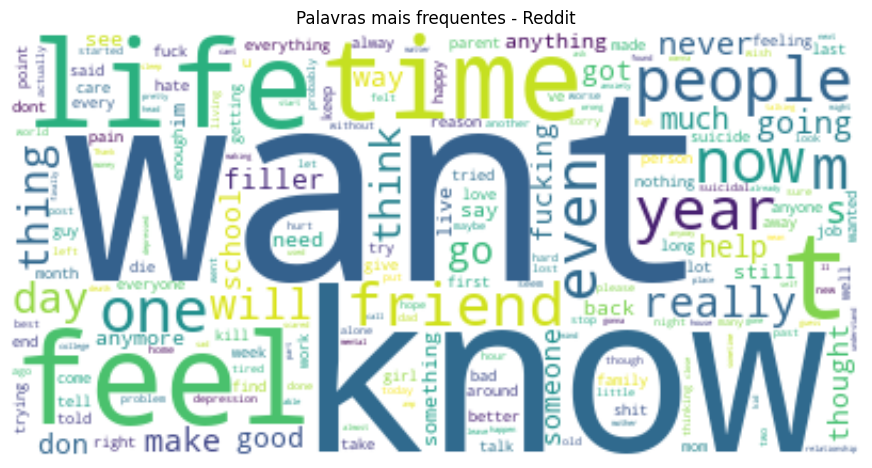

In [50]:
plt.figure(figsize=[11, 11])
plt.imshow(wordcloud_reddit, interpolation='bilinear')
plt.axis("off")
plt.title('Palavras mais frequentes - Reddit')
plt.show()